In [2]:
import sys
import os
sys.path.append("..")
from pyvis.network import Network
from aicnet.environment import Environment
import networkx as nx
import shutil
from itertools import product
import json
import concurrent.futures
from random import shuffle

def save_network_graph(networkx_graph, name, folder):
    G = Network()
    GH = Network()
    G.from_nx(networkx_graph)

    edges = G.edges
    nodes = G.nodes

    node_size = {}
    for edge in G.edges:
        node_id = edge['from']
        if node_id not in node_size:
            node_size[node_id] = 1
        else:
            node_size[node_id]+=1

    for node_id in node_size:
        GH.add_node(node_id, label=str(node_id), value=node_size[node_id], color='orange')
    for node in nodes:
        if node['id'] in node_size:
            continue
        GH.add_node(node['id'], label=str(node['id']), value=1)
    for edge in edges:
        GH.add_node(node_id, label=str(edge['to']), value=1, color='gray')
        GH.add_edge(edge['from'], edge['to'], color='gray')

    GH.toggle_physics(True)
    GH.show_buttons(filter_=['physics'])
    GH.write_html(os.path.join(folder, name + ".html"))
    
    # Serialize to disk
    with open(os.path.join(folder, 'graph.json'), 'w') as fout:
        json.dump(edges, fout)
        
def safe_simulation(numberOfCargos, brokerPersonality, 
               noTransportProviders,noCargoOwners,
               maxNegotiationIterations,displacement,
               deviation, 
               aicnetRankMethod, aicnetRankReverseFlag):
    try:
        simulation(numberOfCargos, brokerPersonality, 
               noTransportProviders,noCargoOwners,
               maxNegotiationIterations,displacement,
               deviation, 
               aicnetRankMethod, aicnetRankReverseFlag)
    except:
        pass
    
def simulation(numberOfCargos, brokerPersonality, 
               noTransportProviders,noCargoOwners,
               maxNegotiationIterations,displacement,
               deviation, 
               aicnetRankMethod, aicnetRankReverseFlag):
    
    simulation_name = "_".join([
        str(numberOfCargos),
        str(brokerPersonality),
        str(noTransportProviders),
        str(noCargoOwners),
        str(maxNegotiationIterations),
        str(displacement),
        str(deviation),
        str(aicnetRankMethod),
        str(aicnetRankReverseFlag)
    ])
    
    simulation_path = os.path.join("new_simulations", simulation_name)
    print(simulation_path)
    if os.path.exists(simulation_path):
#         shutil.rmtree(simulation_path)
        return
    os.makedirs(simulation_path)
    
    e = Environment(
        brokerPersonality,
        noTransportProviders,
        noCargoOwners,
        maxNegotiationIterations,
        displacement,
        deviation
    )

    e.icnet_experiment(numberOfCargos)
    e.aicnet_experiment(numberOfCargos, "pagerank", False)
    e.stats.get_avg_no_iterations_per_negotiation(1)
    e.stats.get_avg_no_iterations_per_negotiation(2)
    e.stats.get_transporter_gain_stats(1)
    e.stats.get_transporter_gain_stats(2)
    e.stats.get_winning_transporter_personality_stats(1)
    e.stats.get_winning_transporter_personality_stats(2)
    e.stats.get_nr_of_failed_negotiations(1)
    e.stats.get_nr_of_failed_negotiations(2)
    
    try:
        # Plotting
        e.stats.plot_sorted_winning_transporters(simulation_path)
        #e.stats.plot_metric_comparison("pagerank", simulation_path)
        e.stats.plot_sorted_successfull_biding_cargo_owners(simulation_path)
    except:
        pass
    
    try:
        e.stats.build_graph(1)
        e.stats.build_graph(2)
    except:
        pass

    try:
        e.stats.save_graph_adj(1, simulation_path)
        e.stats.save_graph_adj(2, simulation_path)
    except:
        pass
    
    try:
        save_network_graph(e.stats.graph_icnet, "icnet", simulation_path)
        save_network_graph(e.stats.graph_aicnet, "aicnet", simulation_path)
    except:
        pass
    
    try:
        e.stats.print_graph_stats(1, simulation_path)
        e.stats.print_graph_stats(2, simulation_path)
    except:
        pass
    
    try:
        e.stats.print_bids_comparison(simulation_path)
    except:
        pass

new_simulations/500_LOW_PRICE_LENIENT_50_1000_12_10_10_pagerank_False


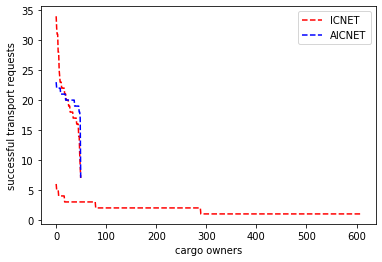

In [3]:
simulation(numberOfCargos=500, 
           brokerPersonality='LOW_PRICE_LENIENT', 
           noTransportProviders=50,
           noCargoOwners=1000,
           maxNegotiationIterations=12,
           displacement=10,
           deviation=10, 
           aicnetRankMethod='pagerank', 
           aicnetRankReverseFlag='False')

In [12]:
options_numberOfCargos = [500]
options_brokerPersonality = ["LOW_PRICE_LENIENT", "LOW_PRICE_CONSERVATIVE", "HIGH_PRICE_LENIENT", "HIGH_PRICE_CONSERVATIVE"]
options_noTransportProviders = [15, 200]
options_noCargoOwners = [500]
options_maxNegotiationIterations = [12, 200]
options_displacement = [10, 90]
options_deviation = [10, 90]
options_aicnetRankMethod = ["pagerank"]
options_aicnetRankReverseFlag = [False]
options = [
    options_numberOfCargos,
    options_brokerPersonality,
    options_noTransportProviders,
    options_noCargoOwners,
    options_maxNegotiationIterations,
    options_displacement,
    options_deviation,
    options_aicnetRankMethod,
    options_aicnetRankReverseFlag
]
simulation_options = []
current_option = 0

while current_option < len(options):
    while current_variant < len(options[current_option]):
        simulation_option = []
        for idx, option in enumerate(options):
            if idx == current_option:
                simulation_option.append(option[current_variant])
            else:
                simulation_option.append(option[0])
        current_variant+=1
        if (simulation_option not in simulation_options):
            simulation_options.append(simulation_option)
    current_option+=1
    current_variant = 0

simulation_options = [tuple(x) for x in simulation_options]
simulation_options


[(500, 'LOW_PRICE_LENIENT', 15, 500, 12, 10, 10, 'pagerank', False),
 (500, 'LOW_PRICE_CONSERVATIVE', 15, 500, 12, 10, 10, 'pagerank', False),
 (500, 'HIGH_PRICE_LENIENT', 15, 500, 12, 10, 10, 'pagerank', False),
 (500, 'HIGH_PRICE_CONSERVATIVE', 15, 500, 12, 10, 10, 'pagerank', False),
 (500, 'LOW_PRICE_LENIENT', 200, 500, 12, 10, 10, 'pagerank', False),
 (500, 'LOW_PRICE_LENIENT', 15, 500, 200, 10, 10, 'pagerank', False),
 (500, 'LOW_PRICE_LENIENT', 15, 500, 12, 90, 10, 'pagerank', False),
 (500, 'LOW_PRICE_LENIENT', 15, 500, 12, 10, 90, 'pagerank', False)]